In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from termcolor import colored
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from  sklearn.cluster import BisectingKMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from  sklearn.cluster import BisectingKMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from  sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
X= pd.read_csv('../../preprocessing/X_preprocessed1.csv')
y=  pd.read_csv('../../preprocessing/Y_preprocessed1.csv')
feature_names = X.columns
y=y['stroke']

In [3]:
def clustering_accuracy(real, predicted):
    total = len(real)
    correct = sum(a == b for a, b in zip(real, predicted))
    score = (correct / total) * 100
    return score
clustering_acc=[]
silueta=[]

In [4]:
normalScaler = StandardScaler()
normalScaler.fit(X)
StandardScaler()

X_normalized = pd.DataFrame(normalScaler.transform(X))
clustering_a=[]


In [5]:
Bkm2 =  BisectingKMeans(n_clusters=2,  bisecting_strategy='biggest_inertia', random_state=48,init='k-means++')
Bkm2.fit(X_normalized)

BisectingKMeans(init='k-means++', n_clusters=2, random_state=48)

In [6]:
clustering_a.append(clustering_accuracy(y, Bkm2.labels_))
silueta.append(silhouette_score(X_normalized, Bkm2.labels_))

In [7]:
km1 = KMeans(n_clusters=2, max_iter=500, init='k-means++' ,n_init= 'auto',random_state=48)
km1.fit(X_normalized)

KMeans(max_iter=500, n_clusters=2, n_init='auto', random_state=48)

In [8]:
clustering_a.append(clustering_accuracy(y, km1.labels_))
silueta.append(silhouette_score(X_normalized, km1.labels_))

In [9]:
model = AgglomerativeClustering(n_clusters=2, linkage='average', compute_distances=True)
model.fit(X_normalized)

AgglomerativeClustering(compute_distances=True, linkage='average')

In [10]:
clustering_a.append(clustering_accuracy(y, model.labels_))
silueta.append(silhouette_score(X_normalized, model.labels_))

In [11]:
clustering_a

[65.94245449207281, 65.94245449207281, 95.08710119397142]

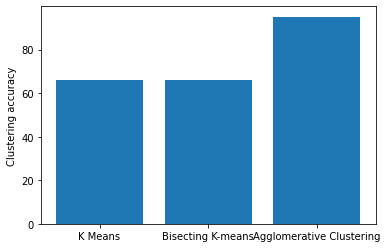

In [12]:
names=['K Means', 'Bisecting K-means', 'Agglomerative Clustering']
plt.bar(names, clustering_a)
plt.ylabel('Clustering accuracy')

plt.show()

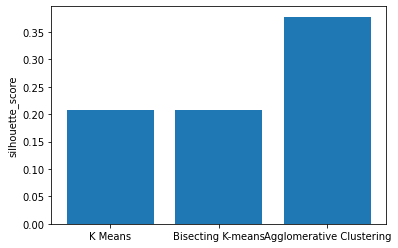

In [13]:
names=['K Means', 'Bisecting K-means', 'Agglomerative Clustering']
plt.bar(names, silueta)
plt.ylabel('silhouette_score')

plt.show()